# Objectives

Java June is a company that owns coffee shops in a number of locations in Europe.
The company knows that stores with more reviews typically get more new customers. This is
because new customers consider the number of reviews when picking between two shops.
They want to get more insight into what leads to more reviews.
They are also interested in whether there is a link between the number of reviews and rating.
They want a report to answer these questions.

# Import & Cleaning

## Data Loading and Preliminary Inspection

The first step in my analysis was to load the dataset into a Pandas DataFrame. This is a crucial process as Pandas DataFrames provide a robust and flexible structure ideal for handling and analyzing structured data efficiently.

Upon loading the data, my immediate task was to understand its structure and identify any missing values. This step is essential to ensure the integrity and reliability of my analysis. Using df.info(), I observed that there are missing values in the 'Ratings' and 'Reviews' columns, with 2 missing entries in each. More notably, the 'Dine-in' and 'Takeout' options columns have 60 and 56 missing values, respectively. Additionally, these columns are not in the appropriate binary format, which is crucial for accurately representing the nature of these features.

In [1]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('coffee.csv')

#  Display information about the dataframe to better understand data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


## Handling Missing Values

The dataset contains several columns, each with its unique characteristics and potential missing values. The following table outlines how I will address missing values in each column:

| Column Name     | Criteria                                                                                                   |
|-----------------|------------------------------------------------------------------------------------------------------------|
| Region          | Nominal. Store location from 10 possible regions (A to J). Missing values should be replaced with “Unknown”. |
| Place name      | Nominal. The name of the store. Missing values should be replaced with “Unknown”.                          |
| Place type      | Nominal. Type of coffee shop (Coffee shop, Cafe, Espresso bar, Others). Missing values should be replaced with “Unknown”. |
| Rating          | Ordinal. Average rating of the store from reviews on a 5-point scale. Missing values should be replaced with 0. |
| Reviews         | Nominal. The number of reviews given to the store. Missing values should be replaced with the overall median number. |
| Price           | Ordinal. The price range of products in the store (\$, \$\$, \$\$\$). Missing values should be replaced with “Unknown”. |
| Delivery Option | Nominal. Indicates if delivery is available (True or False). Missing values should be replaced with False. |
| Dine in Option  | Nominal. Indicates if dine-in is available (True or False). Missing values should be replaced with False. |
| Takeaway Option | Nominal. Indicates if take away is available (True or False). Missing values should be replaced with False. |

To implement this, I defined a dictionary mapping each column to its respective fill value. Notably, for the 'Reviews' column, I used the median of existing values, ensuring a statistically representative fill value. Here’s the code segment illustrating this process:

In [2]:
# Define a dictionary for filling missing values
fill_values = {
    'Rating': 0,
    # Fill Reviews with median only after checking for missing values
    'Dine in option': False,
    'Takeout option': False
}

# Fill missing values according to the dictionary and ensure correct data types
df.fillna(fill_values, inplace=True)

# Now fill the 'Reviews' column with the median
df['Reviews'].fillna(df['Reviews'].median(), inplace=True)

# Display the first few rows of the dataframe to confirm filling of missing values
display(df.head())

# Display information about the dataframe to confirm data types and non-null counts
df.info()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   200 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 10.1+ KB


# Exploratory Data Analysis

## Analysis of Store Ratings

To gain insights into customer satisfaction, I visualized the distribution of store ratings using a bar plot. The plot revealed two key observations:

**No Low Ratings**: There are no ratings below 3.9, indicating a generally high level of customer satisfaction across Java June stores.

**Concentration of Higher Ratings**: A significant portion of stores received ratings of 4.3 or higher, with 4.6 and 4.7 being particularly common.

This distribution suggests that customers who chose to leave ratings generally had positive experiences. The absence of lower ratings could indicate a tendency for dissatisfied customers to refrain from rating, or it might reflect an overall high standard across the stores. However, this observation warrants further investigation to understand the complete customer experience spectrum.

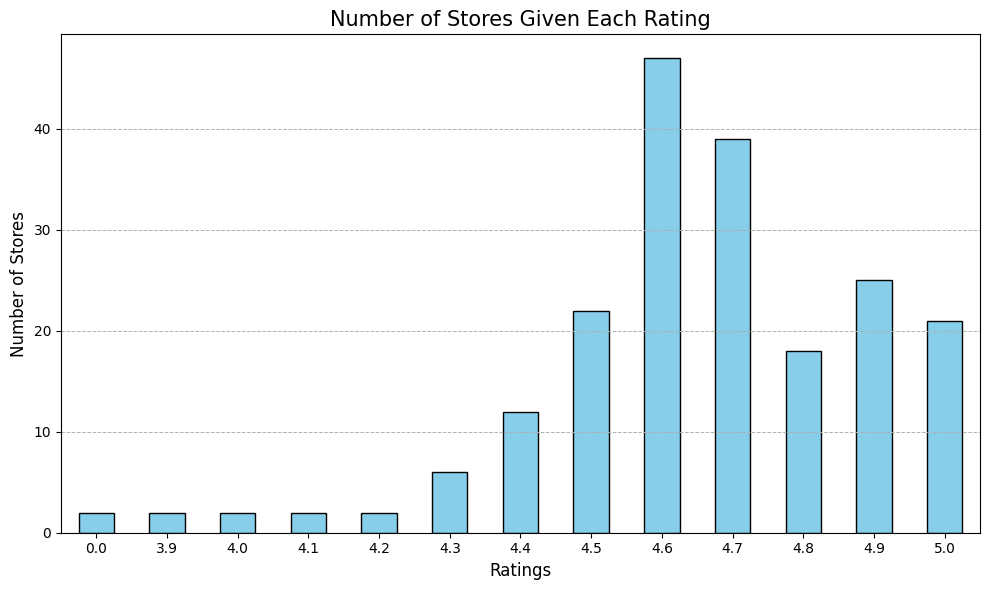

In [3]:
import matplotlib.pyplot as plt

# Create a count plot for the 'Rating' column
plt.figure(figsize=(10,6))
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Number of Stores Given Each Rating', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.xticks(rotation=0)  # Rotates X-Axis Ticks by 45-degrees
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()

## Review Distribution Analysis

The histogram below illustrates the distribution of the number of reviews across Java June stores. This histogram is right-skewed, meaning that a large number of stores have a relatively small number of reviews, while a few stores have a very high number of reviews.

Notably, the majority of stores fall into the first bin, indicating that most Java June stores are not accumulating a high number of reviews. This insight could point to opportunities for Java June to enhance customer engagement and review solicitation strategies, particularly in stores with fewer reviews. Understanding these patterns is crucial for developing targeted strategies to increase the visibility and appeal of stores through customer reviews.

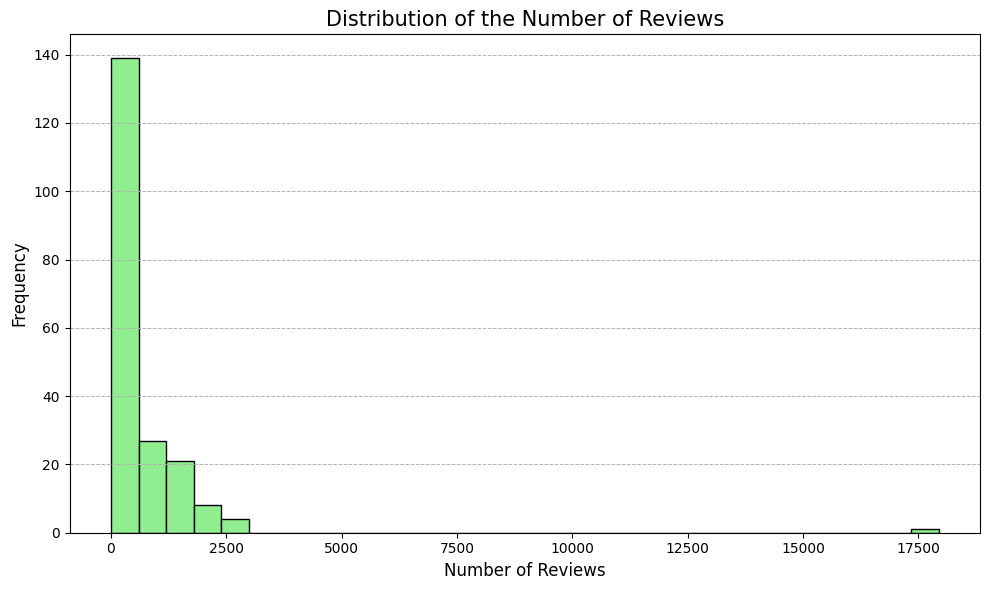

In [4]:
# Plotting the distribution of the number of reviews
plt.figure(figsize=(10,6))
plt.hist(df['Reviews'], bins=30, color='lightgreen', edgecolor='black')

# Adding title and labels
plt.title('Distribution of the Number of Reviews', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()

## Log Transformation of Review Counts

In this part of my analysis, I applied a log transformation to the number of reviews for each store. Log transformation is a powerful technique, especially useful in dealing with skewed data. By applying this transformation, I aim to normalize the distribution of review counts, making it more symmetrical and easier to analyze.

After the transformation, I visualized the new distribution of log-transformed review counts. This visualization is crucial as it helps in understanding the spread and central tendency of the data post-transformation.

By transforming the data in this way, I can better identify patterns and relationships that may be obscured in the original skewed distribution. This step is particularly useful for subsequent statistical analyses and modeling, as many statistical techniques assume a normal distribution of the variables.

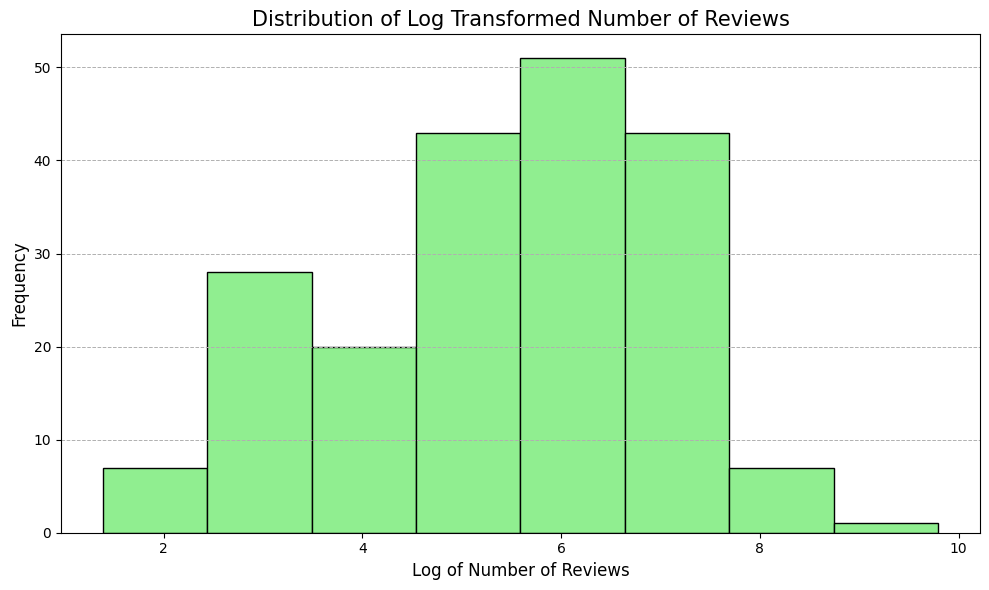

In [5]:
import numpy as np

# Applying log transformation
df['log_reviews'] = np.log1p(df['Reviews'])

# Plotting the distribution of log-transformed reviews
plt.figure(figsize=(10,6))
plt.hist(df['log_reviews'], bins=8, color='lightgreen', edgecolor='black')
plt.title('Distribution of Log Transformed Number of Reviews', fontsize=15)
plt.xlabel('Log of Number of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

## Box Plot Analysis: Reviews by Rating

In this section of my analysis, I visualized how the number of reviews is distributed across different ratings using a box plot. Box plots are particularly useful for displaying the spread and skewness of data, and they can also highlight the presence of outliers.

By grouping the reviews based on the store ratings, this box plot allows me to observe several aspects:

**Central Tendency and Spread**: For each rating, the box plot shows the median number of reviews and the interquartile range (IQR), providing insights into the central tendency and variability of reviews for stores with different ratings.

**Outliers**: The plot can reveal any outliers in the number of reviews for each rating category. These outliers represent stores that have an unusually high or low number of reviews compared to others within the same rating category.

**Comparison Across Ratings**: This visualization enables a direct comparison of the review distributions across different ratings, which can be useful for understanding how customer engagement through reviews correlates with the perceived quality of the store.

Such insights are crucial for Java June in understanding the relationship between customer satisfaction (as indicated by ratings) and customer engagement (as indicated by the number of reviews). The findings can inform strategies to boost customer reviews, particularly in segments where they are lagging.



<Figure size 1000x600 with 0 Axes>

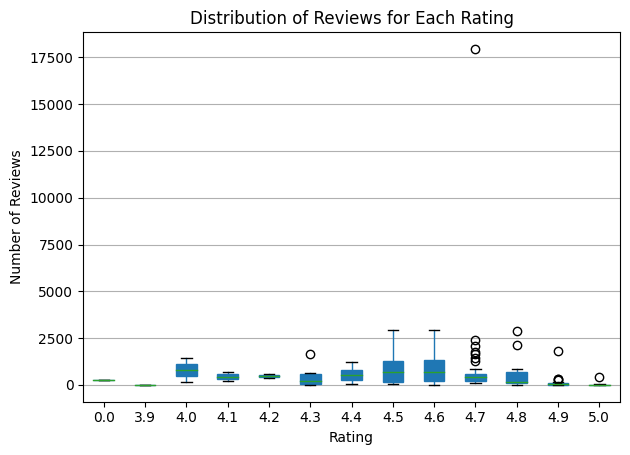

In [6]:
# Plotting the box plot
plt.figure(figsize=(10,6))
df.boxplot(column='Reviews', by='Rating', grid=False, patch_artist=True)

# Adding title and labels
plt.title('Distribution of Reviews for Each Rating')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Rating' title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Adding horizontal grid lines only
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

## Box Plot Analysis After Outlier Removal

To refine my analysis, I identified and removed extreme outliers from my data. In this case, I focused on removing stores with an exceptionally high number of reviews, specifically those with more than 17500 reviews. Outliers can sometimes skew the analysis, making it difficult to observe the underlying trends.

After filtering out this extreme case, I recreated the box plot to examine the distribution of reviews by rating in this refined dataset. This adjusted visualization allows me to:

**Observe More Typical Patterns**: By excluding the extreme outliers, I can focus on the more typical review patterns across the different ratings.

**Enhance Comparability**: This adjustment makes it easier to compare the review distribution across different rating categories, as the scale is no longer dominated by extreme values.

**Identify Subtle Trends**: With outliers removed, I can better identify subtle trends and patterns that might have been obscured.

Such a refined analysis is crucial for Java June to understand the typical customer engagement levels and to design strategies that address the needs and behaviors of the majority of their stores.

<Figure size 1000x600 with 0 Axes>

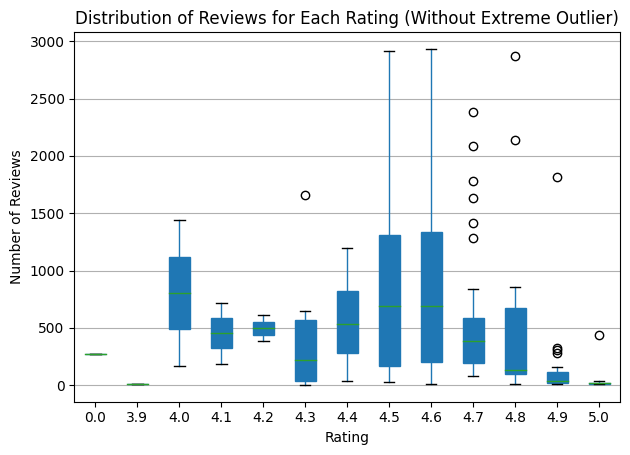

In [7]:
# Removing the specific outlier
df_filtered = df[~(df['Reviews'] > 17500)]

# Plotting the box plot with the filtered data
plt.figure(figsize=(10,6))
df_filtered.boxplot(column='Reviews', by='Rating', grid=False, patch_artist=True)

# Adding title and labels
plt.title('Distribution of Reviews for Each Rating (Without Extreme Outlier)')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Rating' title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Adding horizontal grid lines only
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

# Model Development

## Machine Learning Model for Predicting Review Counts

In this phase, I transitioned to predictive modeling. My objective was to create a model to predict the log-transformed number of reviews for each store based on various features.

**Data Preprocessing**:

- I started by selecting categorical columns ('Region', 'Place type', 'Price') for one-hot encoding. One-hot encoding is a process that converts categorical variables into a form that could be provided to machine learning algorithms to improve predictions.
- I also converted boolean columns ('Dine in option', 'Takeout option', 'Delivery option') to numeric format (0 and 1) for consistency in data representation.

**One-Hot Encoding with ColumnTransformer**:

- I used ColumnTransformer along with OneHotEncoder to apply one-hot encoding to the selected categorical columns. This approach ensures that only the specified columns are transformed, while the rest are passed through unchanged.

**Model Training**:

- I then split the data into training and testing sets, maintaining 80% of the data for training and 20% for testing. This split is crucial for evaluating the model's performance on unseen data.
- I trained a linear regression model on the training data. Linear regression is a suitable choice for this kind of prediction task as it's simple, interpretable, and provides a good baseline.

**Model Evaluation**:

- After training, I used the model to predict the log-transformed number of reviews for the test set.
- I evaluated the model's performance using Mean Squared Error (MSE) and its square root, the Root Mean Squared Error (RMSE). These metrics provide a measure of how accurately the model predicts the response, with lower values indicating better fit.

The results, represented by the MSE and RMSE, give me an understanding of the model's accuracy in predicting the number of reviews. This modeling step is crucial for Java June to predict customer engagement and plan strategies accordingly.

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select categorical columns for one-hot encoding
categorical_columns = ['Region', 'Place type', 'Price']

# Convert boolean columns to numeric (0 and 1)
df_filtered['Dine in option'] = df_filtered['Dine in option'].astype(int)
df_filtered['Takeout option'] = df_filtered['Takeout option'].astype(int)
df_filtered['Delivery option'] = df_filtered['Delivery option'].astype(int)

# One-hot encode categorical variables
# I create the ColumnTransformer object and specify that I want to apply OneHotEncoder to the categorical_columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Passthrough columns that are not being transformed
)

# Apply the transformation to the dataframe
X = preprocessor.fit_transform(df_filtered.drop(['Reviews', 'log_reviews', 'Place name'], axis=1))
y = df_filtered['log_reviews'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = baseline_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_rmse = np.sqrt(baseline_mse)  # Calculate the root mean squared error (RMSE)

(baseline_mse, baseline_rmse)

(1.3987927193103162, 1.1827056773814508)

## Random Forest Regression for Predictive Modeling

In this section of my analysis, I employed a Random Forest Regressor model. Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the average prediction of the individual trees. This approach often results in a model that has higher accuracy and is less prone to overfitting compared to a single decision tree.

**Model Initialization**:

- I initialized a Random Forest Regressor with 100 trees (n_estimators=100). The random_state parameter ensures the reproducibility of my results.

**Model Training**:

- The model was trained on the same training dataset used for the linear regression model. Training involves fitting multiple decision trees on various sub-samples of the dataset and using averaging to improve the predictive accuracy and control overfitting.

**Model Prediction and Evaluation**:

- After training, I used the model to predict the log-transformed number of reviews for the test set.
- I evaluated the model's performance using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), similar to the evaluation of the linear regression model.

The MSE and RMSE values will provide insights into how well the Random Forest model performs compared to the baseline linear regression model. This comparison is vital to determine the most effective model for predicting customer review counts for Java June.

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
comparison_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on your training data
comparison_model.fit(X_train, y_train)

# Make predictions with the model on the test data
comparison_y_pred = comparison_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
comparison_mse = mean_squared_error(y_test, comparison_y_pred)
comparison_rmse = np.sqrt(comparison_mse)

(comparison_mse, comparison_rmse)

(1.1397784477277577, 1.0676040688044224)

## Comparison of Predictive Models: Actual vs. Predicted Values

To visually assess the performance of my two predictive models – Linear Regression and Random Forest – I created scatter plots comparing the actual log-transformed number of reviews against the predicted values from each model.

**Visualization Strategy**:

- Two scatter plots were generated, one for each model. The Linear Regression predictions are represented in blue, while the Random Forest predictions are in green.
- Each point in the scatter plot represents a single store, with its actual log-transformed review count on the x-axis and the predicted count from the models on the y-axis.

**Reference Line for Perfect Predictions**:

- A dashed line representing perfect predictions (where actual and predicted values are equal) was added to the plot. This line serves as a reference to gauge the accuracy of the models.

**Interpreting the Plots**:

- The closer the points lie to the dashed line, the more accurate the predictions.
- By comparing the scatter of points from both models, I can visually assess which model more closely aligns with the line of perfect predictions, indicating higher predictive accuracy.

These visualizations are critical in understanding the practical performance of the models. They provide an intuitive way to compare the models' abilities to predict the number of reviews accurately.

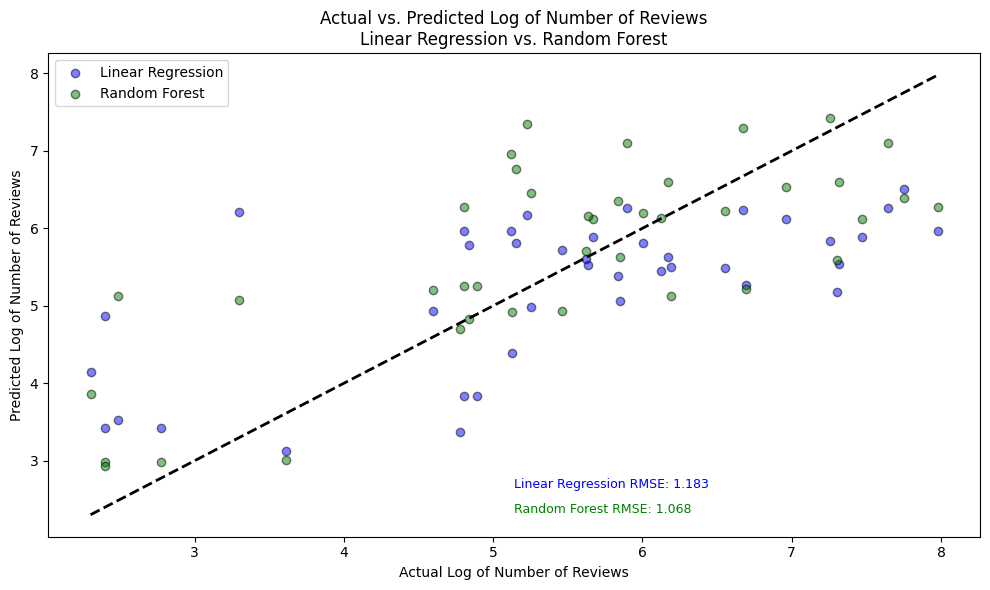

In [10]:
# Plot settings
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs. predicted values using Linear Regression
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Linear Regression', edgecolor='black')

# Scatter plot for actual vs. predicted values using Random Forest
plt.scatter(y_test, comparison_y_pred, alpha=0.5, color='green', label='Random Forest', edgecolor='black')

# Plot the line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Title and labels
plt.title('Actual vs. Predicted Log of Number of Reviews\nLinear Regression vs. Random Forest')
plt.xlabel('Actual Log of Number of Reviews')
plt.ylabel('Predicted Log of Number of Reviews')
plt.legend()

# Add RMSE values as text annotations
plt.text(0.5, 0.1, f'Linear Regression RMSE: {baseline_rmse:.3f}', fontsize=9, color='blue', transform=plt.gca().transAxes)
plt.text(0.5, 0.05, f'Random Forest RMSE: {comparison_rmse:.3f}', fontsize=9, color='green', transform=plt.gca().transAxes)

# Legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Insights from Feature Importance Analysis

Both the linear regression as well as the random forest seem reliable due to there low RMSE scores. The random forest's RMSE is slightly lower so this is the model I will use and extract feature importances from.

Based on the output from my feature importance analysis for the Java June project using the Random Forest model, I can derive several key insights:

1. **Rating is the Most Influential Factor:**
   - The 'Rating' feature holds the highest importance score (approximately 50.4%). This indicates that the average rating of a coffee shop is the most significant predictor of the number of reviews it receives.

2. **Importance of Dine-in Option:**
   - The 'Dine in option' is the second most influential feature, with an importance score of around 16.1%. This suggests that the availability of dine-in services significantly impacts customer engagement in terms of reviews.

3. **Role of Delivery Option:**
   - The 'Delivery option' also plays a notable role, though less than 'Rating' and 'Dine in option', with a score of about 5.5%. It implies that offering delivery services can influence the likelihood of receiving customer reviews.

4. **Regional Influence:**
   - Various regions (e.g., 'Region_E', 'Region_G', 'Region_C') have varying levels of impact, highlighting the influence of a store's location on the number of reviews it attracts.

5. **Type of Establishment:**
   - Different types of establishments, such as 'Cafe' and 'Coffee shop', also contribute to the prediction of review counts, but with a relatively smaller impact compared to factors like 'Rating' and 'Dine in option'.

6. **Comparative Importance of Features:**
   - The distribution of importance scores among these features helps Java June understand which aspects of their operations and service offerings have the most significant impact on customer engagement through reviews.

This analysis provides valuable insights for Java June, suggesting that focusing on customer satisfaction (as reflected in ratings), enhancing dine-in experiences, and optimizing services based on location could be effective strategies for increasing customer reviews and engagement.

In [11]:
# Extract feature importances from the model
feature_importances = comparison_model.feature_importances_

# Get feature names after one-hot encoding
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display table
importances_df

,Feature,Importance
17,remainder__Rating,0.504064
19,remainder__Dine in option,0.161177
18,remainder__Delivery option,0.055287
4,cat__Region_E,0.037006
6,cat__Region_G,0.036012
2,cat__Region_C,0.028302
7,cat__Region_H,0.023150
10,cat__Place type_Cafe,0.022230
11,cat__Place type_Coffee shop,0.020747
8,cat__Region_I,0.017421


# Recommendations

Based on the results of the feature importance analysis from the Random Forest model, here are some recommendations for Java June:


1. **Focus on Enhancing Ratings:**
   - Given the significant impact of ratings on review counts, prioritize initiatives that improve customer satisfaction and thereby ratings. Regularly gather customer feedback and implement improvements in areas like service quality, product range, and ambiance.

2. **Optimize Dine-in Experience:**
   - With the 'Dine in option' being a key driver, invest in enhancing the dine-in experience. This could include interior design upgrades, staff training for better customer service, and offering unique in-store experiences.

3. **Leverage Delivery Services:**
   - While the 'Delivery option' has a lesser impact than dine-in, it's still influential. Ensure efficient and customer-friendly delivery services. Consider partnerships with delivery platforms or promotions to increase visibility.

4. **Tailor Strategies by Region:**
   - The importance of various regions implies differing customer behaviors or preferences. Conduct a region-wise analysis to tailor marketing strategies and store offerings according to local tastes and preferences.

5. **Differentiate Based on Establishment Type:**
   - As 'Cafe' and 'Coffee shop' types show varying influence, tailor the ambiance, menu, and services according to the type of establishment to better cater to the expected customer demographic.

6. **Continual Monitoring and Improvement:**
   - Regularly monitor customer reviews and ratings for real-time insights into customer satisfaction. Use this feedback for continuous improvement.

7. **Promote Review Generation:**
   - Encourage customers to leave reviews through incentives, easy-to-use review platforms, and by creating a culture of feedback within the store.

8. **Data-Driven Decision Making:**
   - Continue to leverage data analytics for decision making. Regular updates to the analysis with new data can help track the effectiveness of implemented strategies and guide future decisions.


These recommendations aim to align operational and marketing strategies with the key factors influencing customer reviews, thus helping Java June enhance its customer engagement and business performance.